# MICRO 2022 Artifact Evaluation
# Sparseloop: An Analytical Approach To Sparse Tensor Accelerator Modeling
### Yannan N. Wu, Po-An Tsai, Angshuman Parashar, Vivienne Sze, Joel S. Emer

## Context

In this artifact, we provide evaluation setups for the important experiments (the motivating example, validations for accelerator designs, and the case study). Please follow the instructions in each cell to run the evaluations.

For each experiment, we give a *very conservative estimate* of how long the runs will take. The input specifications and related scripts can be found in `../evaluation_setups`. **The easiest way to validate the outputs is to compare the generated figure/table to the figure/table in the paper**, but we do provide a `ref_outputs` folder for each evaluation for more detailed comparison of results if necessary.



***Please note that to allow easier and faster reproduction, for most of the experiments, we directly provide the mappings found by our offline search*** *instead of letting Sparseloop performing online seach for the best mapping.* ***Sparseloop does allow automatic exploration of various mappings*** *as demonstrated in eval1 (more information on tool usage can be found [here](https://accelergy.mit.edu/tutorial.html) and [here](https://accelergy.mit.edu/sparse_tutorial.html)).*


### If you have any questions, please feel free to reach out at timeloop-accelergy@mit.edu. Thanks!




## Eval 1: Data representation format comparison (Fig.1 in paper)

This evaluation compares the processing speed and energy efficiency of two architectures that support different representation formats: 1) bitmask with gating; 2) coordinate list with skipping, running matrix multiplication workloads with various density degrees

### Step 1: Run sweep  ( <5min)

In [ ]:
%%bash
cd ../evaluation_setups/fig1_format_comparison_setup/scripts
echo "input specs at: ../evaluation_setups/fig1_format_comparison_setup/"
chmod +x sweep.sh
time ./sweep.sh

### Step 2: Parse and generate plot
1) run first cell to parse and plot

2) run next cell to display the generated figures

3) compare the figures to Fig.1 in paper

In [ ]:
%%bash
cd ../evaluation_setups/fig1_format_comparison_setup/scripts
time python3 parse_and_plot.py

In [ ]:
from IPython.display import Video, Image, HTML, display
import matplotlib.pyplot as plt

cycles_fig = "../evaluation_setups/fig1_format_comparison_setup/outputs/fig_cycles.png"
energy_fig = "../evaluation_setups/fig1_format_comparison_setup/outputs/fig_energy_pJ.png"

display(Image(cycles_fig))
display(Image(energy_fig))

## Eval 2: EyerissV2 PE Validation ( 1. Fig.12 in paper; 2. showcase the main idea presented in Table 5)

We simulate mobilenet0.5 layers on a variation of eyeriss v2 PE with one compute unit.

We show experimental setups for both running evaluations with statistical density model (uniform density model) and actual data based density model. The modeling time is much longer with actual data based model. **This fact showcases the idea presented in Table 5: analytical modeling with statisical density model allows faster modeling.** (*Experiments for Table 5 requires manaul instrumantaion into the source code, which is not convienent for non-developers to setup, so we use this evlauation to showcase the main idea.*)

### Step 1: Run sweep with statistical density modeling (< 3min)

In [ ]:
%%bash
cd ../evaluation_setups/fig12_eyerissv2_pe_setup/scripts
echo "input specs at: ../evaluation_setups/fig12_eyerissv2_pe_setup/"
time python3 sweep.py

### Step 2: Parse and generte plot

1) run first cell to parse and generate figure

2) run next cell to diplay the generated figure

3) compare to per layer the ground truth and uniform modeling bars in Fig.12 in the paper

In [ ]:
%%bash
cd ../evaluation_setups/fig12_eyerissv2_pe_setup/scripts
python3 parse_and_plot.py

In [ ]:
from IPython.display import Video, Image, HTML, display
import matplotlib.pyplot as plt

fig = "../evaluation_setups/fig12_eyerissv2_pe_setup/outputs/uniform_only/fig.png"

display(Image(fig))

### Step 3: Run autal data evaluation on three layers ( <30 min)

Since actual data based evaluations are slow compared to statistical ones, the default evaluation only run on three layers. Please tune the `--max_layers` knob in the command below if you would like to try more layers.

**Note that this also demonstrate that our modeling speed with the statiscal density models are fast, which is the main idea presented in Table 5 in paper**

In [ ]:
%%bash
cd ../evaluation_setups/fig12_eyerissv2_pe_setup/scripts
echo "input specs at: ../evaluation_setups/fig12_eyerissv2_pe_setup/"

# update the number of max layers below (<=8) to see more bar groups in fig12, but the run will take longer
time python3 sweep.py --include_actual --max_layers 3

### Step 4: Parse and generate plot


1) run first cell to parse and generate figure

2) run next cell to diplay the generated figure

3) compare to the group of bars for **L07** in Fig.12 in the paper. 
   The main idea here is that compared to `baseline`, `acutal_data` based evlauation is able to accurately capture design behaviors with no error, whereas there is some error due statistical approximations when using the `uniform` distribution.

In [ ]:
%%bash
cd ../evaluation_setups/fig12_eyerissv2_pe_setup/scripts
python3 parse_and_plot.py --include_actual

In [ ]:
from IPython.display import Video, Image, HTML, display
import matplotlib.pyplot as plt

fig = "../evaluation_setups/fig12_eyerissv2_pe_setup/outputs/uniform_actual/fig.png"

display(Image(fig))

## Eval 3: Eyeriss Validation (Table 7 in paper)

We simulate the AlexNet Conv layers on the Eyeriss accelerator, and present the DRAM traffic compression ratio. 


### Step 1: Run sweep (< 5min)

In [ ]:
%%bash
cd ../evaluation_setups/table7_eyeriss_setup/scripts
echo "input specs at: ../evaluation_setups/table7_eyeriss_setup/"
time python3 sweep.py 
# To enable mapspace search, uncomment command below (note that the run will take much longer)
# mapspace search might end up with a slightly different mapping due to runtime randomness
# time python3 sweep.py --search_mapping

### Step 2: Parse and generate table

1) run the first cell to parse results and print table entries

2) compare the entries to the second row in table 7 in the paper

***Please note that we used the public 45nm data for energy modeling in this evaluation instead of the 65nm private PDK used in our paper's evaluations.*** *Although the the DRAM compression ratio is not impacted, the energy reported in the raw results can be different. However, we do see significant energy reduction with the gating SAF implemented in this architecture.*

In [ ]:
%%bash
cd ../evaluation_setups/table7_eyeriss_setup/scripts
python3 parse_and_plot.py

# If used mapspace search in the previous step
# python3 parse_and_plot.py --stats_prefix timeloop-mapper

## Eval 4: Dual Side Sparse Tensor Core Validation (Fig.13 in paper)

We simulate matrix multiplication workloads with various sparsity degrees running on dual side sparse tensor core design.

### Step 1: Run sweep ( < 5min)

In [ ]:
%%bash
cd ../evaluation_setups/fig13_dstc_setup/scripts
echo "input specs at: ../evaluation_setups/fig13_dstc_setup/"
time python3 sweep.py

### Step 2: Parse and generate plot

1) run first cell to parse and generate figure

2) run next cell to diplay the generated figure

3) compare to Fig.13 in the paper

In [ ]:
%%bash
cd ../evaluation_setups/fig13_dstc_setup/scripts
python3 parse_and_plot.py

In [ ]:
from IPython.display import Video, Image, HTML, display
import matplotlib.pyplot as plt

fig = "../evaluation_setups/fig13_dstc_setup/outputs/fig.png"

display(Image(fig))

## Eval 5: Sparse tensor core validation and the related case study (Figure 15 in paper)

We simulate the selected ResNet50 layers on the sparse tensor core (STC) accelerator and compare various sparse designs based on the tensor core setup. 

Please see more details on the various designs validated/explored in Section 6.3.5 and Section 6.4 in the paper. 


### Step 1: Run sweep ( < 8min)

In [4]:
%%bash
cd ../evaluation_setups/fig15_stc_related_setup/scripts
echo "input specs at: ../evaluation_setups/fig15_stc_related_setup/"
time python3 sweep.py
# To enable mapspace search, uncomment command below (note that the run will take much longer)
# mapspace search might end up with a slightly different mapping due to runtime randomness
# time python3 sweep.py --search_mapping

input specs at: ../evaluation_setups/fig15_stc_related_setup/
Utilization = 1.00 | pJ/Compute =    1.832
Utilization = 1.00 | pJ/Algorithmic-Compute =    1.643 | pJ/Compute =    1.643
Utilization = 0.83 | pJ/Algorithmic-Compute =    2.415 | pJ/Compute =    5.489
Utilization = 1.00 | pJ/Algorithmic-Compute =    1.643 | pJ/Compute =    1.643
Utilization = 1.00 | pJ/Algorithmic-Compute =    1.643 | pJ/Compute =    1.643
Utilization = 1.00 | pJ/Algorithmic-Compute =    1.311 | pJ/Compute =    1.311
Utilization = 1.00 | pJ/Compute =    1.845
Utilization = 1.00 | pJ/Algorithmic-Compute =    1.682 | pJ/Compute =    1.682
Utilization = 0.72 | pJ/Algorithmic-Compute =    1.502 | pJ/Compute =    5.564
Utilization = 1.00 | pJ/Algorithmic-Compute =    1.682 | pJ/Compute =    1.682
Utilization = 1.00 | pJ/Algorithmic-Compute =    1.682 | pJ/Compute =    1.682
Utilization = 1.00 | pJ/Algorithmic-Compute =    1.271 | pJ/Compute =    1.271
Utilization = 1.00 | pJ/Compute =    1.781
Utilization = 1.00 


real	1m30.611s
user	0m30.826s
sys	0m1.369s


### Step2: Parse and generate plot

1) run first cell to parse and generate figures

2) run second cell to display the figures

3) compare the generated figure to Fig.15 in the paper

  ***Please note that we used the public 45nm data for energy modeling in this evaluation instead of the 65nm private PDK used in our paper's evaluations.*** As a result, the normalized cycles will match the figure presented in paper, but **the normalized energy will not be an exact match. However, the trends do stay the same for both technology nodes.**


In [5]:
%%bash
cd ../evaluation_setups/fig15_stc_related_setup/scripts
python3 parse_and_plot.py --raw ../outputs/resnet50_selected/*

# If used mapspace search in the previous step
# python3 parse_and_plot.py --raw ../outputs/resnet50_selected/* --stats_prefix timeloop-mapper

dummping stats to  ../csv_results/resnet50_selected-normed-WD-1.0-TC-RF2x-24-bandwidth.csv
Fig saved to  /home/nelliewu/research/workspace/sparse-modeling/micro22-sparseloop-artifact/workspace/2022.micro.artifact/evaluation_setups/fig15_stc_related_setup/outputs/fig_cycles.png
Fig saved to  /home/nelliewu/research/workspace/sparse-modeling/micro22-sparseloop-artifact/workspace/2022.micro.artifact/evaluation_setups/fig15_stc_related_setup/outputs/fig_energy.png


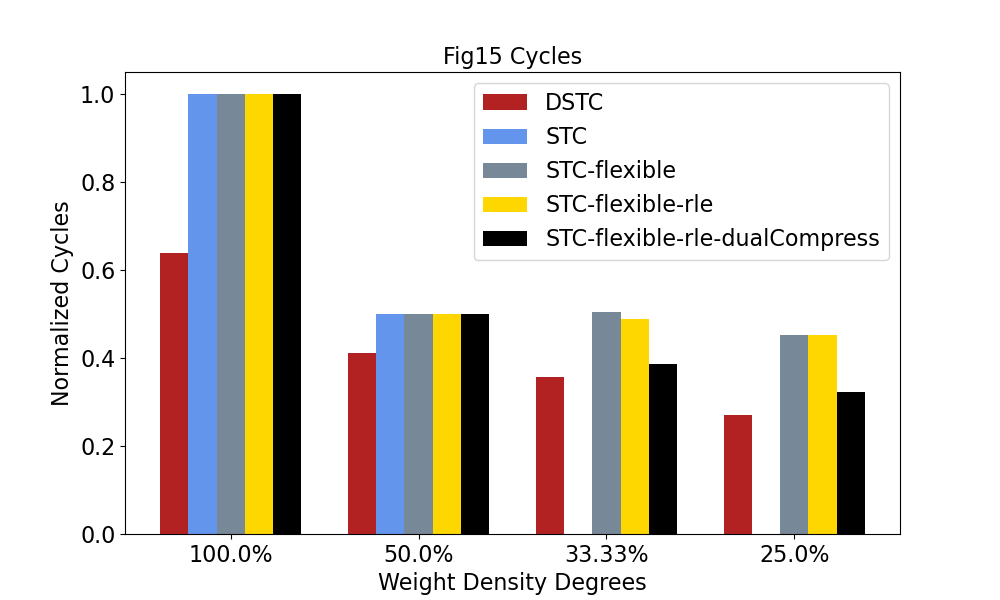

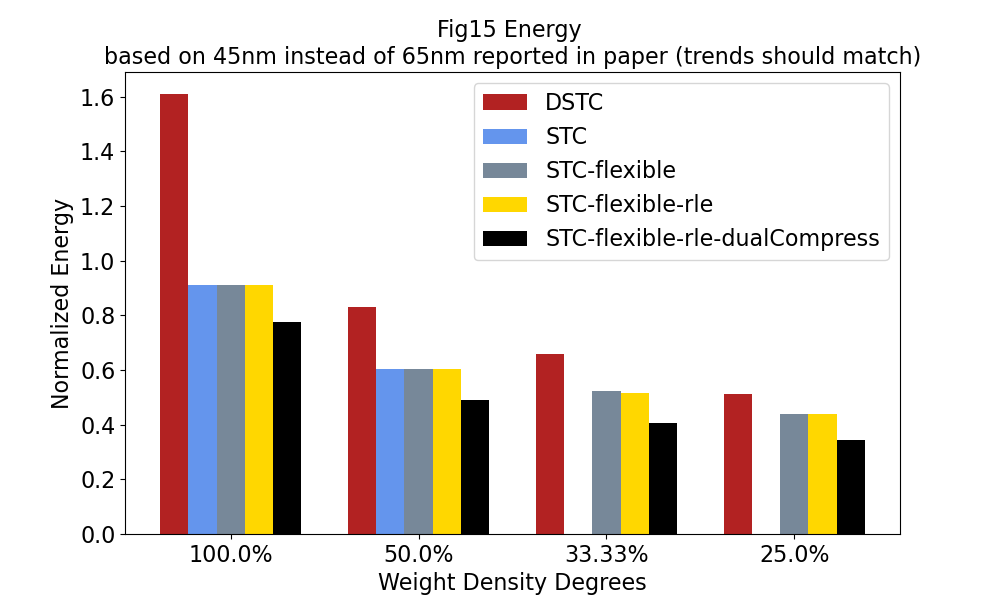

In [6]:
from IPython.display import Video, Image, HTML, display
import matplotlib.pyplot as plt

cycles_fig = "../evaluation_setups/fig15_stc_related_setup/outputs/fig_cycles.png"
energy_fig = "../evaluation_setups/fig15_stc_related_setup/outputs/fig_energy.png"

display(Image(cycles_fig))
display(Image(energy_fig))